# Quadrant Analysis

Quadrant analysis is a simple conditional sampling method to detect coherent structures directly from the high-frequency measurements. For this, the Reddy package provides two functions: `calc_quadrant_analysis` for calculating occurrence frequency and strength of the four quadrants and `plot_quadrant_analysis` for plotting the two variables as scatter plot with a 2d kernel density estimation and a linear regression.

In [1]:
#loading Reddy package
install.packages("../src/Reddy_0.0.0.9000.tar.gz",repos=NULL,source=TRUE)
library(Reddy)

#ec data files
dir_in="../data/ec-data_10Hz_raw"
files=list.files(dir_in,full.names=TRUE)
nf=length(files)

Installing package into ‘/home/lauracma/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)



## Calculation of occurrence frequencies and strengths of the four quadrants with `calc_quadrant_analysis`
The two variables are normalized (if `do_normalization = TRUE`) through
$$ \hat{x} = \frac{x-\overline{x}}{\sigma_x}$$
by substracting the mean value $\overline{x}$ and dividing by $\sigma_x$ to make different variables with different value ranges comparable and centered around zero. The function counts the occurrence frequency of each quadrant, calculates their strength as product $\hat{x}\hat{y}$ and as covariance $\overline{\hat{x}'\hat{y}'}$. The parameter `hole_sizes`can be used to filter out very strong events by applying the filter conditions $\vert \hat{x}\hat{y} \vert \le H \cdot \vert \overline{\hat{x}'\hat{y}'}\vert$. Usually, $y$ is chosen to be the vertical velocity $w$.

In [2]:
i=8 #select a file
tmp=read.table(files[i],sep=",",header=T)

qa_Tw=calc_quadrant_analysis(tmp$T_degC,tmp$w_m.s) #based on the raw data (10 Hz) directly (i.e., unrotated)
qa_Tw

5448,4689,4232,3829,3542,3355,3214,3120,3071,3043,3017
2975,144,8,1,0,0,0,0,0,0,0
6619,3812,3732,4177,4539,4821,5015,5153,5238,5302,5345
2958,300,71,19,4,1,0,0,0,0,0
1.0680473,0.8157981,0.5926998,0.4160602,0.2595930,0.128415,0.00496475,-0.09889583,-0.1580028,-0.1941919,-0.2292195
-0.2913532,-1.3388982,-2.3107778,-3.0595706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.6190221,0.3023105,0.3188273,0.4780481,0.6247966,0.729391,0.81096819,0.88180372,0.9271087,0.9649898,0.9919303
-0.4200449,-1.6791768,-2.7216259,-3.5668925,-4.3541217,-5.200543,NaN,NaN,NaN,NaN,NaN
0.106717873,0.3190217,0.3943558,0.39175959,0.33878042,0.28464356,0.22478907,0.16509696,0.13053088,0.10926006,0.08895242
0.053090898,0.1180140,0.1147860,NA,NA,NA,NA,NA,NA,NA,NA
-0.009141232,0.2882998,0.1194031,0.04190299,0.05120756,0.06056233,0.06900792,0.07814975,0.08542762,0.09238304,0.09700542


## Plotting quadrant analysis with `plot_quadrant_analysis`
`plot_quadrant_analysis` plots a scatter plot of two variables with a 2d kernel density estimation (`MASS::kde2d`) and a linear regression (`lm()`) to allow for a visual inspection.

**Example: Quadrant Analysis (T,w) during daytime**

[1] "../data/ec-data_10Hz_raw/2018-07-20T120000.csv"

Call:
lm(formula = yval ~ xval)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5818 -0.5491  0.0005  0.5471  4.1136 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.849e-16  6.716e-03    0.00        1    
xval         4.337e-01  6.716e-03   64.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9011 on 17998 degrees of freedom
Multiple R-squared:  0.1881,	Adjusted R-squared:  0.1881 
F-statistic:  4170 on 1 and 17998 DF,  p-value: < 2.2e-16



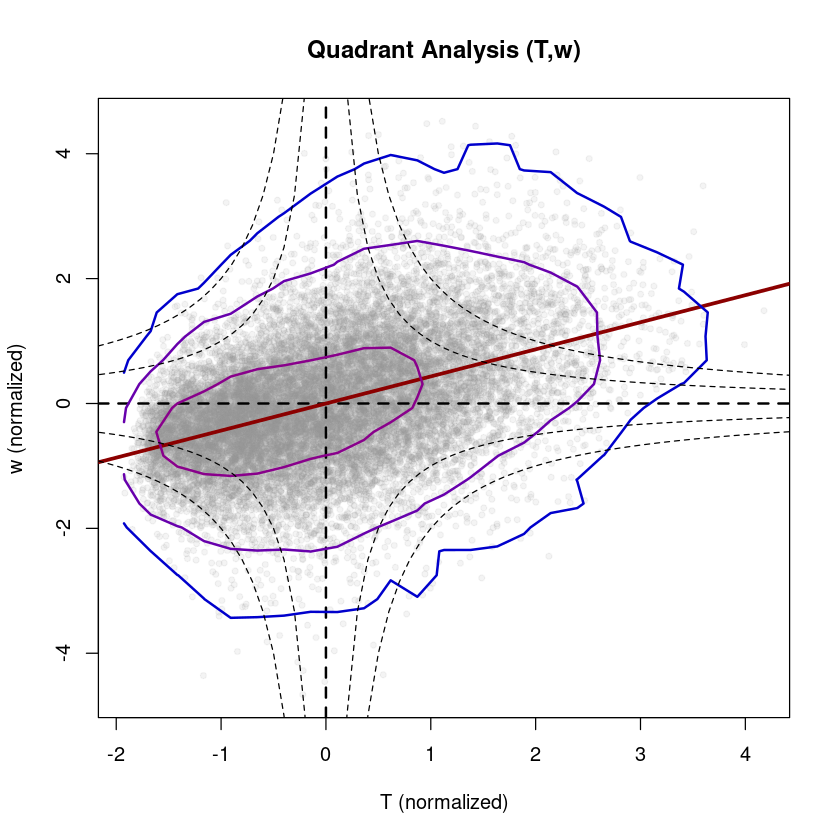

In [3]:
i=8 #select a file -- a daytime example
print(files[i])
tmp=read.table(files[i],sep=",",header=T)

plot_quadrant_analysis(tmp$T_degC,tmp$w_m.s,xlab="T (normalized)",ylab="w (normalized)",main="Quadrant Analysis (T,w)")

**Example: Quadrant Analysis (T,w) during nighttime**

[1] "../data/ec-data_10Hz_raw/2018-07-21T030000.csv"

Call:
lm(formula = yval ~ xval)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8334 -0.5262  0.0022  0.5425  6.2520 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.006e-17  7.120e-03    0.00        1    
xval        -2.957e-01  7.121e-03  -41.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9553 on 17998 degrees of freedom
Multiple R-squared:  0.08745,	Adjusted R-squared:  0.0874 
F-statistic:  1725 on 1 and 17998 DF,  p-value: < 2.2e-16



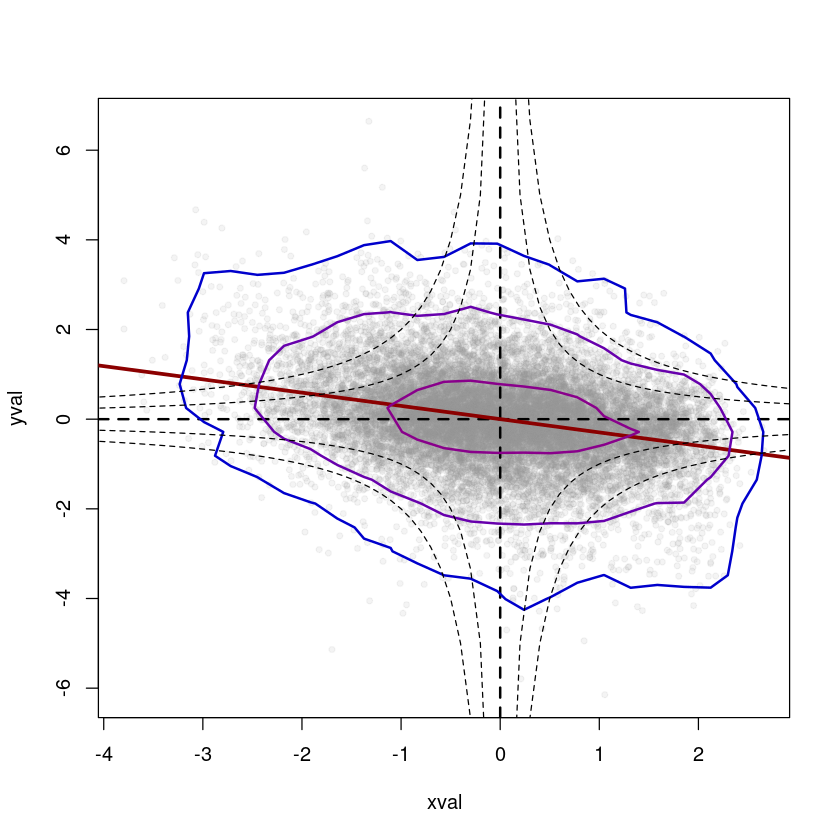

In [4]:
i=38 #select a file -- a nighttime example
print(files[i])
tmp=read.table(files[i],sep=",",header=T)
plot_quadrant_analysis(tmp$T_degC,tmp$w_m.s) #based on the raw data (10 Hz) directly (i.e., unrotated)

**Example: Quadrant Analysis (u,w) during nighttime**


Call:
lm(formula = yval ~ xval)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9799 -0.5474 -0.0342  0.5301  6.6338 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.749e-16  7.326e-03    0.00        1    
xval        -1.843e-01  7.326e-03  -25.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9829 on 17998 degrees of freedom
Multiple R-squared:  0.03395,	Adjusted R-squared:  0.0339 
F-statistic: 632.5 on 1 and 17998 DF,  p-value: < 2.2e-16



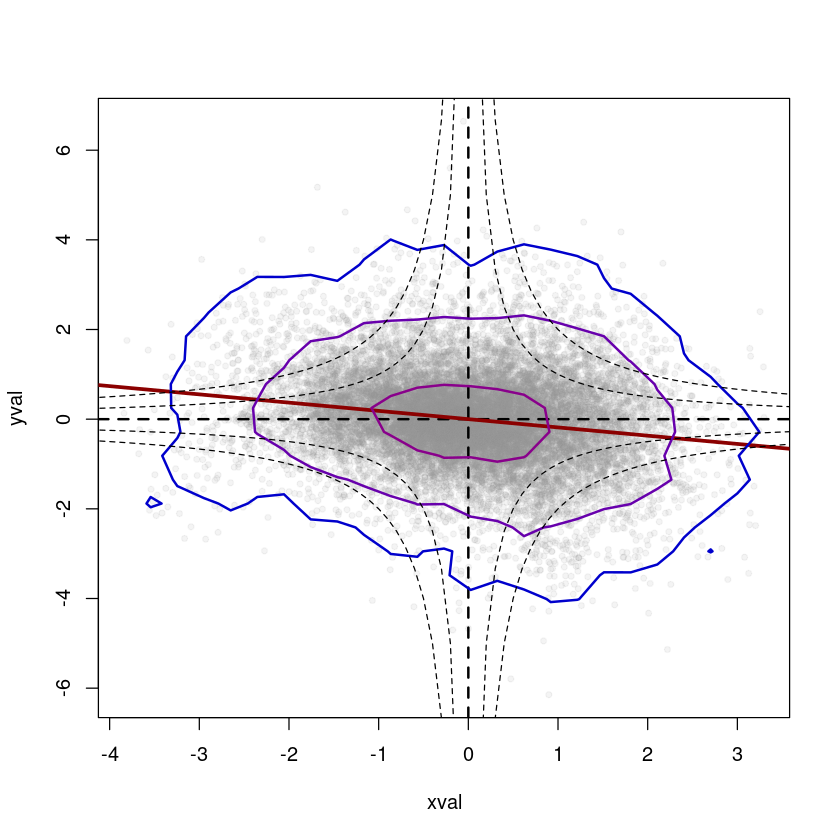

In [5]:
plot_quadrant_analysis(tmp$u_m.s,tmp$w_m.s) #based on the raw data (10 Hz) directly (i.e., unrotated)

Quadrant analysis can be applied to any combination of two measured quantities and also allows to check the measurement quality or significance of the relation between them. It can also be used to check the effect of the coordinate rotation (e.g., `rotate_double`) visually.

## Literature
- Li, D. and Bou-Zeid, E. (2011). Coherent Structures and the Dissimilarity of
Turbulent Transport of Momentum and Scalars in the Unstable Atmospheric
Surface Layer. Boundary-Layer Meteorol, 140:243–262.
- Wallace, J. (2016). Quadrant Analysis in Turbulence Research: History and
Evolution. Annu Rev Fluid Mech, 48:131–158.